In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df = pd.read_csv(r"C:\Users\dgadi\Downloads\salaries.csv")
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [ ]:
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [ ]:
df.size

64

In [ ]:
df.shape

(16, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   company                16 non-null     object
 1   job                    16 non-null     object
 2   degree                 16 non-null     object
 3   salary_more_then_100k  16 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 644.0+ bytes


In [ ]:
print("Missing Values:\n",df.isnull().sum(), "\n")

Missing Values:
 company                  0
job                      0
degree                   0
salary_more_then_100k    0
dtype: int64 



C:\Users\dgadi\AppData\Local\Temp\ipykernel_1516\3613990471.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='salary_more_then_100k', data=df, palette='coolwarm')


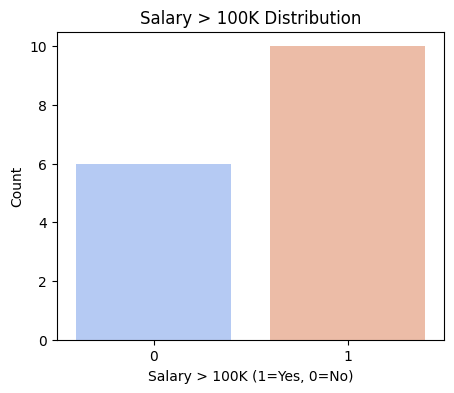

In [ ]:
import seaborn as sns
plt.figure(figsize=(5,4))
sns.countplot(x='salary_more_then_100k', data=df, palette='coolwarm')
plt.title('Salary > 100K Distribution')
plt.xlabel('Salary > 100K (1=Yes, 0=No)')
plt.ylabel('Count')
plt.show()

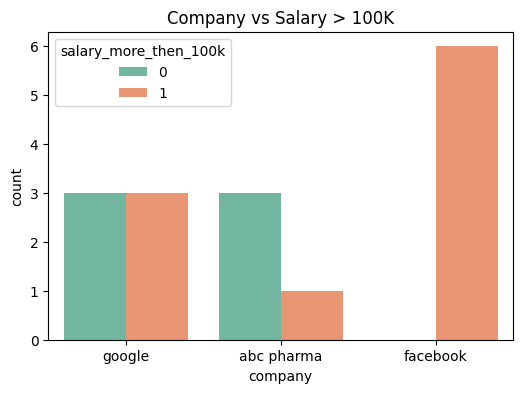

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='company', hue='salary_more_then_100k', data=df, palette='Set2')
plt.title('Company vs Salary > 100K')
plt.show()


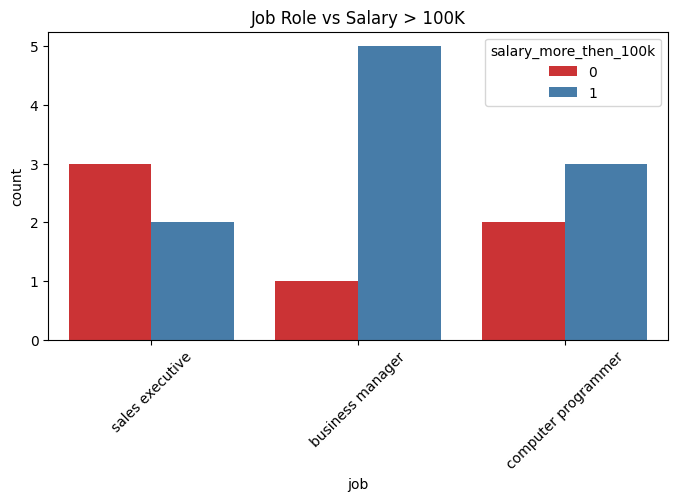

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='job', hue='salary_more_then_100k', data=df, palette='Set1')
plt.title('Job Role vs Salary > 100K')
plt.xticks(rotation=45)
plt.show()

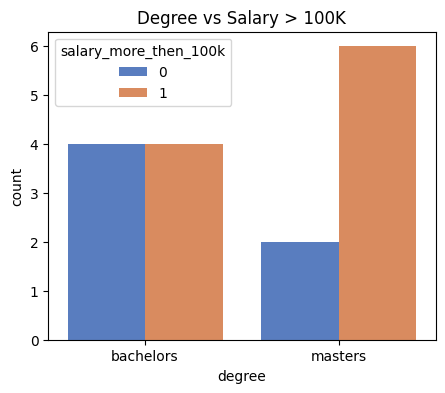

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x='degree', hue='salary_more_then_100k', data=df, palette='muted')
plt.title('Degree vs Salary > 100K')
plt.show()

In [ ]:
inputs = df.drop('salary_more_then_100k',axis='columns')
inputs.head()

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors


In [ ]:
target = df['salary_more_then_100k']
target.head()

0    0
1    0
2    1
3    1
4    0
Name: salary_more_then_100k, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [ ]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])
inputs

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [ ]:
inputs_n = inputs.drop(['company','job','degree'], axis='columns')

In [ ]:
inputs_n.head()

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0


In [ ]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(inputs_n, target)

DecisionTreeClassifier()

In [ ]:
model.score(inputs_n,target)

1.0

In [ ]:
#is the salary of Google, computer science, Master's Degree >100k
model.predict([[2,1,1]])

C:\Users\dgadi\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
#is the salary of Google, computer science, Bachelor's Degree >100k
model.predict([[2,1,0]])

C:\Users\dgadi\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])